<a href="https://colab.research.google.com/github/hsrah/deep_learning/blob/master/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting closing price


1. Upload dataset from your local drive to colab
2. Importing the packages
3. Reading the dataset
4. Exploring the data
5. Importing more packages for prediction
6. Train Test Split
7. Building the model
8. Prediction on ts_test
9. Prediction with Test data

# Upload dataset from your local drive to colab

In [1]:
!wget "https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202012-2016%20Training%20-%20stocks2012-2016.csv"
!wget "https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202017%20Test%20-%20stocks2017.csv"

--2020-04-19 14:13:05--  https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202012-2016%20Training%20-%20stocks2012-2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67529 (66K) [text/plain]
Saving to: ‘Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv’

Uniqlo(FastRetailin 100%[===================>]  65.95K  --.-KB/s    in 0.01s   

2020-04-19 14:13:05 (4.53 MB/s) - ‘Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv’ saved [67529/67529]

--2020-04-19 14:13:11--  https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202017%20Test%20-%20stocks2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [20]:
stock_df = df[['Date', 'Close']]
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1226 non-null   object
 1   Close   1226 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


we need to convert object to datetine format


In [21]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1226 non-null   datetime64[ns]
 1   Close   1226 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.3 KB


In [0]:
stock_df.set_index('Date', inplace=True)

In [26]:
print(stock_df.head())
print(stock_df.tail())

            Close
Date             
2016-12-30  41830
2016-12-29  42660
2016-12-28  43270
2016-12-27  43620
2016-12-26  43340
            Close
Date             
2012-01-11  14590
2012-01-10  14390
2012-01-06  13850
2012-01-05  13800
2012-01-04  13720


we have data form 4th JAN 2012 to 30 Dec 2016


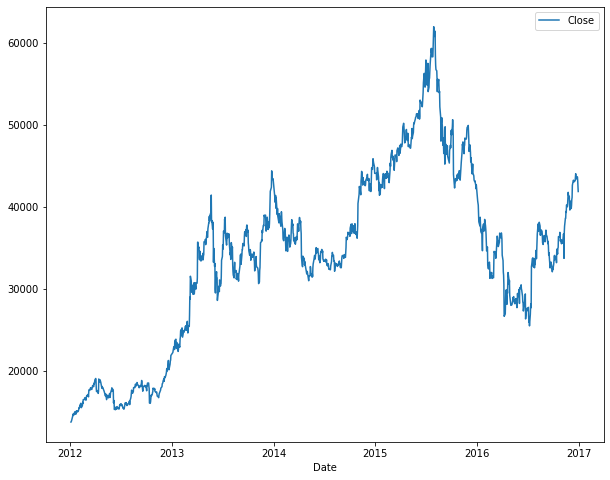

In [29]:
#check graph of price 
plt.figure(figsize=[10,8])      
sns.lineplot(data=stock_df)

# Model create

In [0]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler()

In [0]:
duration = 30 # we are splitting data of last 30 days as test and other days as train
ds_train = stock_df[duration:]
ds_test = stock_df[:duration]

In [34]:
print(ds_train.shape)
print(ds_test.shape)

print(ds_test.head)

(1196, 1)
(30, 1)
            Close
Date             
2016-12-30  41830
2016-12-29  42660
2016-12-28  43270
2016-12-27  43620
2016-12-26  43340


In [0]:
min_max_scalar.fit(ds_train.values)
training = min_max_scalar.transform(ds_train.values);




Here we will predict tomorrow price based on todays stock price.
IP and OP variable are same that is scaled closing price.
so we will map something like this.
X  => Y
10 => 20
20 => 30
30 => 40 
...

where 10 is for ex 21st Jan price then 20 is 22nd Jan.
X is input and Y is outpit.


In [42]:
x_train = training[0:len(training) - 1]
y_train = training[1:len(training)]
print(x_train[:5])
print(y_train[:5])
print(len(x_train), len(y_train))

[[0.53266957]
 [0.51545323]
 [0.51566065]
 [0.49533292]
 [0.48060568]]
[[0.51545323]
 [0.51566065]
 [0.49533292]
 [0.48060568]
 [0.41402199]]
1195 1195


We need to reshape before passing to Neural Network

In [0]:
x_train = np.reshape(x_train, (len(x_train),1,1)) # to make it 3D

In [46]:
x_train.shape

(1195, 1, 1)

In [0]:
num_units = 64 #Hyper parameter for input features i.e no of neurons
optimizer = 'adam'
activation = 'sigmoid' # Bring non linearity and op between 0 and 1
loss_func = 'mean_squared_error'
batch_size = 5 # feed 5 rows at once
num_epoch = 50 

In [48]:
regressor = Sequential()
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation, input_shape=(None, 1))) #None for code can be used for any dimensions

# Adding the output layer
regressor.add(Dense(units = 1)) # as op variable is 1

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_func)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epoch)

Epoch 1/50
1195/1195 [==============================] - 1s 757us/step - loss: 0.0512
Epoch 2/50
1195/1195 [==============================] - 0s 333us/step - loss: 0.0232
Epoch 3/50
1195/1195 [==============================] - 0s 331us/step - loss: 0.0105
Epoch 4/50
1195/1195 [==============================] - 0s 339us/step - loss: 0.0036
Epoch 5/50
1195/1195 [==============================] - 0s 334us/step - loss: 0.0010
Epoch 6/50
1195/1195 [==============================] - 0s 322us/step - loss: 4.0034e-04
Epoch 7/50
1195/1195 [==============================] - 0s 330us/step - loss: 3.2672e-04
Epoch 8/50
1195/1195 [==============================] - 0s 322us/step - loss: 3.2247e-04
Epoch 9/50
1195/1195 [==============================] - 0s 325us/step - loss: 3.2740e-04
Epoch 10/50
1195/1195 [==============================] - 0s 338us/step - loss: 3.1976e-04
Epoch 11/50
1195/1195 [==============================] - 0s 326us/step - loss: 3.2684e-04
Epoch 12/50
1195/1195 [================

Prediction on test dataset

In [0]:
testing = min_max_scalar.fit_transform(ds_test.values) #transform min max
input_testing = np.reshape(testing, (len(testing),1,1)) # reshape for RNN ip
predicted_price = regressor.predict(input_testing)                              # Make predictions on the test data
predicted_price = min_max_scalar.inverse_transform(predicted_price)      # Inverse transform the predicted price


In [57]:
error = predicted_price-ds_test.values  

print(error)

[[ -2.265625  ]
 [ -2.42578125]
 [ -7.40234375]
 [-12.5859375 ]
 [ -8.29296875]
 [-10.2890625 ]
 [-20.42578125]
 [-12.5859375 ]
 [ -5.828125  ]
 [ -5.828125  ]
 [ -4.60546875]
 [ -5.42578125]
 [ -6.69140625]
 [ -5.828125  ]
 [ -2.1484375 ]
 [ -6.4453125 ]
 [ -8.27734375]
 [-14.70703125]
 [-18.1640625 ]
 [-10.08203125]
 [-11.87890625]
 [-19.7265625 ]
 [-14.25390625]
 [ -5.28515625]
 [ -4.5546875 ]
 [ -2.6484375 ]
 [-12.7890625 ]
 [-16.33203125]
 [-14.34375   ]
 [-21.86328125]]


In [61]:
ds_test.values[:,0]

array([41830, 42660, 43270, 43620, 43340, 43480, 44000, 43620, 43130,
       43130, 43000, 43090, 43210, 43130, 42590, 41100, 40870, 40150,
       39760, 40660, 40460, 39570, 40200, 41260, 41370, 41730, 40360,
       39970, 40190, 39280])

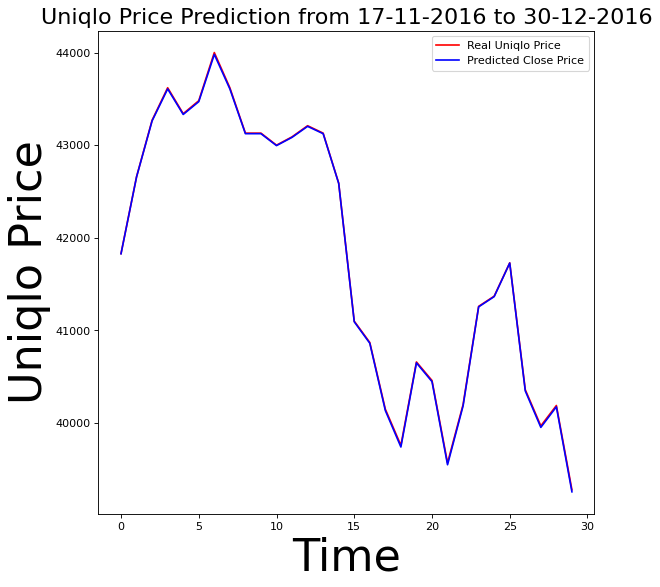

In [60]:
# Plot the Actual price and the predicted price
test_set = ds_test.values
plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real Uniqlo Price')                      # Actual Price
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted Close Price')      # Predicted Price

plt.title('Uniqlo Price Prediction from 17-11-2016 to 30-12-2016', fontsize = 20)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Uniqlo Price', fontsize = 40)
plt.legend(loc = 'best')
plt.show()

Prediction with other test data 

In [63]:
test_data=pd.read_csv("Uniqlo(FastRetailing) 2017 Test - stocks2017.csv") 
test_data

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,42590,516800,22124250000
6,2017-01-04,42480,43330,42450,43290,648100,27916728000


In [64]:
test_data1=test_data.iloc[:,4]                                                         # Extracting the close price
test_data1

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64

In [68]:
test_data1=np.array(test_data1)
print(test_data1)
test_data1 = np.reshape(test_data1, (-1,1)) 
print(test_data1)
test_data_array = min_max_scalar.fit_transform(test_data1)
test_data_reshaped = np.reshape(test_data_array, (len(test_data_array),1,1))
print(test_data_reshaped)


[38430 38010 38560 38690 39720 42590 43290]
[[38430]
 [38010]
 [38560]
 [38690]
 [39720]
 [42590]
 [43290]]
[[[0.07954545]]

 [[0.        ]]

 [[0.10416667]]

 [[0.12878788]]

 [[0.32386364]]

 [[0.86742424]]

 [[1.        ]]]


In [0]:
predicted_price = regressor.predict(test_data_reshaped)                              # Make predictions on the test data
predicted_price = min_max_scalar.inverse_transform(predicted_price)      # Inverse transform the predicted price

In [70]:
predicted_price

array([[38408.703],
       [37985.543],
       [38539.793],
       [38670.918],
       [39710.16 ],
       [42580.21 ],
       [43267.145]], dtype=float32)